# AutoEncoder Model - Fraud

In [1]:
%config IPCompleter.greedy=True
#%install_ext https://raw.github.com/cpcloud/ipython-autotime/master/autotime.py
#%load_ext autotime

In [2]:
import pandas as pd
import numpy as np

from keras.models import Model
from keras.layers import Input,Dense

Using TensorFlow backend.


In [3]:
df = pd.read_csv("data_afterpca.csv")

In [4]:
df.head()

,Unnamed: 0,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,1,1.504135,1.058194,-0.183572,0.990869,-1.394134,-2.347328,1.509924
1,2,12.445919,1.269237,-1.254890,5.890350,-9.966817,-12.340175,21.139496
2,3,-0.004516,-0.030711,-0.027176,0.008399,-0.011642,-0.003273,0.018293
3,4,0.017084,0.016384,-0.022218,0.034432,-0.031897,-0.047848,0.007923
4,5,4.184936,2.945893,-0.336065,2.685241,-4.025931,-7.931928,1.829774


In [5]:
# Take the top 7 PCs that cover ~94% of variance
train_data = df.iloc[:, 1:8]
train_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,1.504135,1.058194,-0.183572,0.990869,-1.394134,-2.347328,1.509924
1,12.445919,1.269237,-1.254890,5.890350,-9.966817,-12.340175,21.139496
2,-0.004516,-0.030711,-0.027176,0.008399,-0.011642,-0.003273,0.018293
3,0.017084,0.016384,-0.022218,0.034432,-0.031897,-0.047848,0.007923
4,4.184936,2.945893,-0.336065,2.685241,-4.025931,-7.931928,1.829774


In [6]:
train_data.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
count,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06
mean,9.691209e-18,-2.882190e-16,6.242302e-17,-3.539760e-17,6.093075e-17,-1.701545e-17,-2.371589e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.445340e-02,-8.648376e+02,-1.002181e+03,-8.043899e+02,-6.942209e+02,-5.229060e+02,-6.559611e+02
25%,-1.385095e-02,-2.946766e-03,-9.230926e-03,-4.206762e-03,-2.260363e-03,2.135409e-03,-1.010949e-03
50%,-9.397000e-03,3.120021e-03,3.300427e-03,-9.709406e-04,-1.719305e-04,6.013621e-03,3.145017e-03
75%,-5.616067e-03,7.825871e-03,9.814935e-03,3.163786e-03,2.282412e-03,9.651947e-03,7.958117e-03
max,5.817516e+02,4.345353e+02,5.143290e+01,4.123705e+02,5.641676e+01,7.318308e+01,8.090754e+01


In [7]:
train = train_data.values

In [8]:
input_size = 7
hidden_size = 4
code_size = 2

#autoencoder
input_layer = Input(shape=(input_size,)) 
hidden_1 = Dense(hidden_size, activation='relu')(input_layer)
code = Dense(code_size,activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_layer = Dense(input_size, activation='tanh')(hidden_2)

autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
output=autoencoder.fit(train,train, epochs = 10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
1070994/1070994 [==============================] - 49s 46us/step - loss: 0.9942 - acc: 0.2955
Epoch 2/10
1070994/1070994 [==============================] - 45s 42us/step - loss: 0.9925 - acc: 0.3381
Epoch 3/10
1070994/1070994 [==============================] - 48s 45us/step - loss: 0.9923 - acc: 0.3166
Epoch 4/10
1070994/1070994 [==============================] - 45s 42us/step - loss: 0.9919 - acc: 0.3122
Epoch 5/10
1070994/1070994 [==============================] - 47s 44us/step - loss: 0.9919 - acc: 0.3176
Epoch 6/10
1070994/1070994 [==============================] - 49s 46us/step - loss: 0.9918 - acc: 0.3735
Epoch 7/10
1070994/1070994 [==============================] - 48s 44us/step - loss: 0.9923 - acc: 0.3692
Epoch 8/10
1070994/1070994 [==============================] - 47s 44us/step - loss: 0.9918 - acc: 0.3826
Epoch 9/10
1070994/1070994 [==============================] - 53s 49us/step - loss: 0.9919 - acc: 0.3791
Epoch 1

In [10]:
ans = autoencoder.predict(train)

In [37]:
ans.head()

,0,1,2,3,4,5,6
0,0.390684,0.284888,-0.780344,0.575194,-0.113759,-0.768178,-0.863647
1,0.993859,-0.984338,-0.999029,0.984009,-0.447757,-0.771232,-0.998182
2,0.019498,-0.032883,-0.015050,0.011839,-0.000364,0.011497,-0.008988
3,0.005549,0.002658,-0.040651,0.030126,-0.011078,-0.031131,-0.052952
4,0.969459,0.861942,-0.999259,0.981922,-0.042868,-0.999515,-0.999891


In [11]:
ans = pd.DataFrame(ans)

In [12]:
ans.to_csv('ans_Reconstructed.csv',index=False)

In [13]:
ans.iloc[:,2].mean()


0.0038436120375990868

In [14]:
pd.DataFrame(train).iloc[:,2].mean()

6.242302334521171e-17

In [15]:
#n=1
manhattan = (ans - pd.DataFrame(train)).abs()
manhattan_score = manhattan.sum(axis = 1)
manhattan_score

0           8.132301
1          62.093518
2           0.095082
3           0.146413
4          21.411083
5           2.670283
6          10.931473
7           0.421298
8           0.211763
9           0.286654
10          0.471351
11          0.082681
12          0.140703
13          0.135113
14          0.374993
15          0.366302
16          0.366302
17          0.366302
18          0.366302
19          0.366302
20          0.366302
21          0.366302
22          0.366178
23          0.362059
24          0.362059
25          0.372269
26          0.372269
27          0.372269
28          0.372269
29          0.371525
             ...    
1070964     0.033257
1070965     0.097117
1070966     0.038217
1070967     0.105347
1070968     0.040501
1070969     0.041413
1070970     0.042226
1070971     0.067959
1070972     0.036391
1070973     0.046041
1070974     0.038058
1070975     0.046168
1070976     0.060653
1070977     0.043492
1070978     0.033110
1070979     0.038631
1070980     0

In [17]:
#n=2
euclidean = (((ans - pd.DataFrame(train)).abs())**2).sum(axis=1)
euclidean_score = euclidean**(1/2)
euclidean_score

0           3.483334
1          29.578635
2           0.042777
3           0.071404
4           9.484378
5           1.118122
6           4.700313
7           0.198640
8           0.089110
9           0.122080
10          0.201328
11          0.034650
12          0.058398
13          0.056032
14          0.159323
15          0.155594
16          0.155594
17          0.155594
18          0.155594
19          0.155594
20          0.155594
21          0.155594
22          0.155541
23          0.153778
24          0.153778
25          0.158152
26          0.158152
27          0.158152
28          0.158152
29          0.157833
             ...    
1070964     0.013982
1070965     0.049357
1070966     0.018105
1070967     0.047071
1070968     0.019115
1070969     0.017115
1070970     0.020793
1070971     0.029868
1070972     0.016911
1070973     0.021386
1070974     0.016092
1070975     0.021699
1070976     0.027480
1070977     0.019720
1070978     0.014228
1070979     0.019201
1070980     0

In [18]:
manhattan_score=pd.DataFrame(manhattan_score)
euclidean_score=pd.DataFrame(euclidean_score)
fraud_score_AE= pd.concat([manhattan_score,euclidean_score], axis=1)
fraud_score_AE.columns=['Manhattan Score','Euclidean Score']

In [19]:
fraud_score_AE.insert(0,'Record',fraud_score_AE.index+1)

In [20]:
fraud_score_AE.describe()

,Record,Manhattan Score,Euclidean Score
count,1.070994e+06,1.070994e+06,1.070994e+06
mean,5.354975e+05,7.769693e-02,3.571049e-02
std,3.091695e+05,5.910232e+00,2.634514e+00
min,1.000000e+00,2.044649e-03,9.051498e-04
25%,2.677492e+05,2.085101e-02,9.609768e-03
50%,5.354975e+05,3.173298e-02,1.444632e-02
75%,8.032458e+05,4.217578e-02,1.979830e-02
max,1.070994e+06,3.266553e+03,1.491655e+03


In [21]:
fraud_score_AE.to_csv('fraud_score_AE.csv',index=False)

In [22]:
fraud_score_AE.head()

,Record,Manhattan Score,Euclidean Score
0,1,8.132301,3.483334
1,2,62.093518,29.578635
2,3,0.095082,0.042777
3,4,0.146413,0.071404
4,5,21.411083,9.484378


In [ ]:
#dfNY = pd.read_csv("NY property data.csv")

In [ ]:
#eucScr = fraud_score_AE.drop('Manhattan Score', axis=1)

In [ ]:
#eucScr.head()

In [23]:
#bins=eucScr.shape[0]
#colName='Euclidean Score'
#eucScr['Euclidean Rank'] = eucScr['Euclidean Score'].rank(ascending=1)
fraud_score_AE['Euclidean Rank'] = fraud_score_AE['Euclidean Score'].rank(ascending=1)
fraud_score_AE['Manhattan Rank'] = fraud_score_AE['Manhattan Score'].rank(ascending=1)

In [24]:
fraud_score_AE.head()

,Record,Manhattan Score,Euclidean Score,Euclidean Rank,Manhattan Rank
0,1,8.132301,3.483334,1070451.0,1070507.0
1,2,62.093518,29.578635,1070913.0,1070914.0
2,3,0.095082,0.042777,1005689.0,1005944.0
3,4,0.146413,0.071404,1039262.0,1035603.0
4,5,21.411083,9.484378,1070763.0,1070772.0


In [25]:
fraud_score_AE.loc[fraud_score_AE['Manhattan Rank'] == 1000]

,Record,Manhattan Score,Euclidean Score,Euclidean Rank,Manhattan Rank


In [26]:
fraud_score_AE.to_csv('fraud_ScoreAndRanks_AE.csv',index=False)

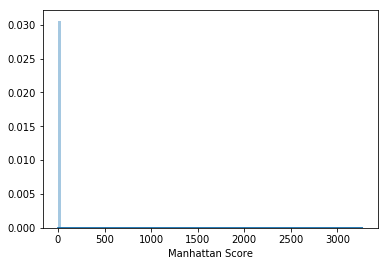

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(fraud_score_AE['Manhattan Score'],bins=100, kde=True)
#plt.title('Distribution of :'+col1)
#plt.ylabel('Density of probability', fontsize=12)
#plt.xlabel(col1, fontsize=12)
#plt.savefig("imgs/"+col1+".png")
plt.show()


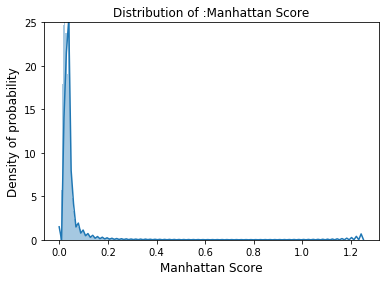

In [32]:
colName='Manhattan Score'
xhigh =1.25
#sns.plt.xlim(0,xhigh)
temp = fraud_score_AE[fraud_score_AE[colName] <= xhigh]
sns.distplot(temp[colName],bins=10000, kde=True)
plt.title('Distribution of :'+colName)
#plt.xscale('log')
plt.ylabel('Density of probability', fontsize=12)
plt.ylim((0.00, 25)) 
#plt.xlim((0.00, 25)) 
plt.xlabel(colName, fontsize=12)
#plt.savefig("imgs/"+colName+".png")
plt.show()

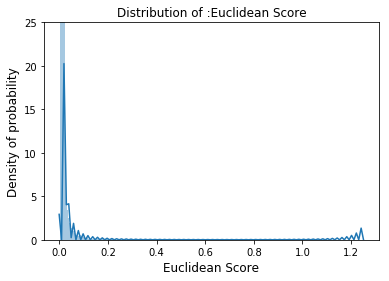

In [33]:
colName='Euclidean Score'
xhigh =1.25
#sns.plt.xlim(0,xhigh)
#temp = fraud_score_AE
temp = fraud_score_AE[fraud_score_AE[colName] <= xhigh]
sns.distplot(temp[colName],bins=10000, kde=True)
plt.title('Distribution of :'+colName)
#plt.xscale('log')
plt.ylabel('Density of probability', fontsize=12)
plt.ylim((0.00, 25)) 
#plt.xlim((0.00, 25)) 
plt.xlabel(colName, fontsize=12)
#plt.savefig("imgs/"+colName+".png")
plt.show()

In [34]:
bins=10
colName='Euclidean Score'
new_data = pd.qcut(fraud_score_AE[colName], bins, labels=list(range(bins)))

In [35]:
type(new_data)
new_data.value_counts()

5    107104
7    107102
9    107100
3    107100
0    107100
4    107099
2    107099
1    107099
8    107096
6    107095
Name: Euclidean Score, dtype: int64

In [36]:
pd.DataFrame(new_data).head()

,Euclidean Score
0,9
1,9
2,9
3,9
4,9
